In [78]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [79]:
df = pd.read_excel('./datasets/BlinkIT Grocery Data.xlsx')
df.head()

,Item Fat Content,Item Identifier,Item Type,Outlet Establishment Year,Outlet Identifier,Outlet Location Type,Outlet Size,Outlet Type,Item Visibility,Item Weight,Sales,Rating
0,Regular,FDX32,Fruits and Vegetables,2012,OUT049,Tier 1,Medium,Supermarket Type1,0.100014,15.10,145.4786,5.0
1,Low Fat,NCB42,Health and Hygiene,2022,OUT018,Tier 3,Medium,Supermarket Type2,0.008596,11.80,115.3492,5.0
2,Regular,FDR28,Frozen Foods,2016,OUT046,Tier 1,Small,Supermarket Type1,0.025896,13.85,165.0210,5.0
3,Regular,FDL50,Canned,2014,OUT013,Tier 3,High,Supermarket Type1,0.042278,12.15,126.5046,5.0
4,Low Fat,DRI25,Soft Drinks,2015,OUT045,Tier 2,Small,Supermarket Type1,0.033970,19.60,55.1614,5.0


In [80]:
df.shape

(8523, 12)

In [81]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item Fat Content           8523 non-null   object 
 1   Item Identifier            8523 non-null   object 
 2   Item Type                  8523 non-null   object 
 3   Outlet Establishment Year  8523 non-null   int64  
 4   Outlet Identifier          8523 non-null   object 
 5   Outlet Location Type       8523 non-null   object 
 6   Outlet Size                8523 non-null   object 
 7   Outlet Type                8523 non-null   object 
 8   Item Visibility            8523 non-null   float64
 9   Item Weight                7060 non-null   float64
 10  Sales                      8523 non-null   float64
 11  Rating                     8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [82]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Outlet Establishment Year,8523.0,2016.450546,3.189396,2011.000,2014.000000,2016.000000,2018.000000,2022.000000
Item Visibility,8523.0,0.066132,0.051598,0.000,0.026989,0.053931,0.094585,0.328391
Item Weight,7060.0,12.857645,4.643456,4.555,8.773750,12.600000,16.850000,21.350000
Sales,8523.0,140.992783,62.275067,31.290,93.826500,143.012800,185.643700,266.888400
Rating,8523.0,3.965857,0.605651,1.000,4.000000,4.000000,4.200000,5.000000


In [83]:
df.isnull().sum()

Item Fat Content                0
Item Identifier                 0
Item Type                       0
Outlet Establishment Year       0
Outlet Identifier               0
Outlet Location Type            0
Outlet Size                     0
Outlet Type                     0
Item Visibility                 0
Item Weight                  1463
Sales                           0
Rating                          0
dtype: int64

In [84]:
for col in df.columns:
  print(col, '-->', df[col].unique(), '\n')

Item Fat Content --> ['Regular' 'Low Fat' 'low fat' 'LF' 'reg'] 

Item Identifier --> ['FDX32' 'NCB42' 'FDR28' ... 'FDU60' 'NCX53' 'FDE52'] 

Item Type --> ['Fruits and Vegetables' 'Health and Hygiene' 'Frozen Foods' 'Canned'
 'Soft Drinks' 'Household' 'Snack Foods' 'Meat' 'Breads' 'Hard Drinks'
 'Others' 'Dairy' 'Breakfast' 'Baking Goods' 'Seafood' 'Starchy Foods'] 

Outlet Establishment Year --> [2012 2022 2016 2014 2015 2020 2011 2018 2017] 

Outlet Identifier --> ['OUT049' 'OUT018' 'OUT046' 'OUT013' 'OUT045' 'OUT017' 'OUT010' 'OUT027'
 'OUT035' 'OUT019'] 

Outlet Location Type --> ['Tier 1' 'Tier 3' 'Tier 2'] 

Outlet Size --> ['Medium' 'Small' 'High'] 

Outlet Type --> ['Supermarket Type1' 'Supermarket Type2' 'Grocery Store'
 'Supermarket Type3'] 

Item Visibility --> [0.1000135  0.00859605 0.02589649 ... 0.03470581 0.02757094 0.10771483] 

Item Weight --> [15.1   11.8   13.85  12.15  19.6    8.89  19.7   20.75     nan 18.85
 17.1   16.35  20.25  17.85  19.2   12.1    6.85  17.25 

In [85]:
# Item Fat Content --> ['Regular' 'Low Fat' 'low fat' 'LF' 'reg'] 
df['Item Fat Content'].replace({'reg': 'Regular',
                                'LF': 'Low Fat',
                                'low fat': 'Low Fat'}, inplace=True)
df['Item Fat Content'].unique()

array(['Regular', 'Low Fat'], dtype=object)

In [103]:
def group_age(yr):
  age = 2024 - yr
  if age >= 0 and age <= 5:
    return '0-5 years'
  if age > 5 and age <= 10:
    return '6-10 years'
  return 'More than 10 years'


df['Outlet Establishment Age'] = df['Outlet Establishment Year'].apply(group_age)
df['Outlet Establishment Age']

0       More than 10 years
1                0-5 years
2               6-10 years
3               6-10 years
4               6-10 years
               ...        
8518            6-10 years
8519            6-10 years
8520            6-10 years
8521            6-10 years
8522            6-10 years
Name: Outlet Establishment Age, Length: 8523, dtype: object

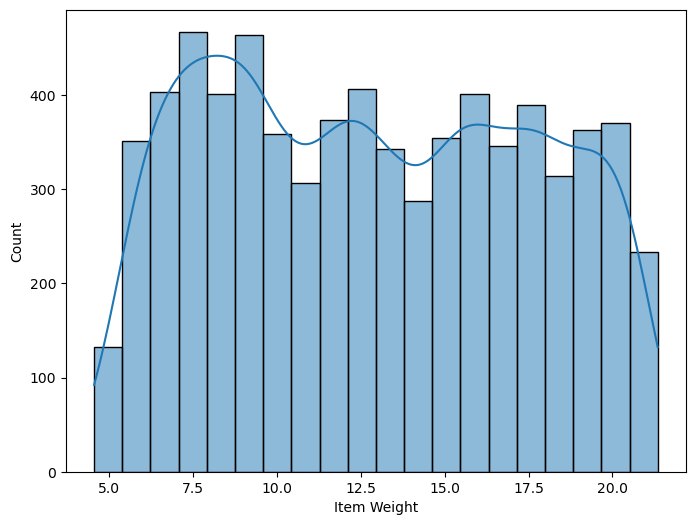

In [87]:
plt.figure(figsize=(8, 6))
sns.histplot(df['Item Weight'], kde=True);

<Axes: xlabel='Item Weight'>

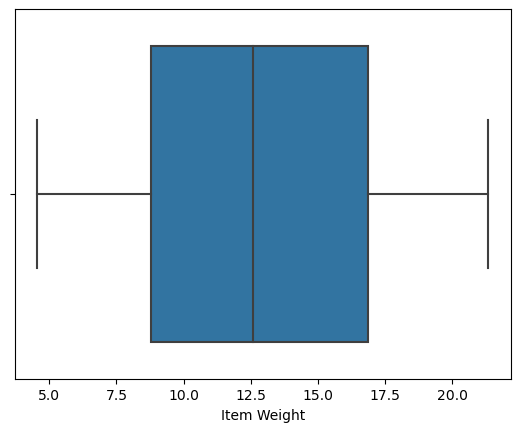

In [88]:
sns.boxplot(x='Item Weight', data=df)

<Axes: xlabel='Item Fat Content', ylabel='Item Weight'>

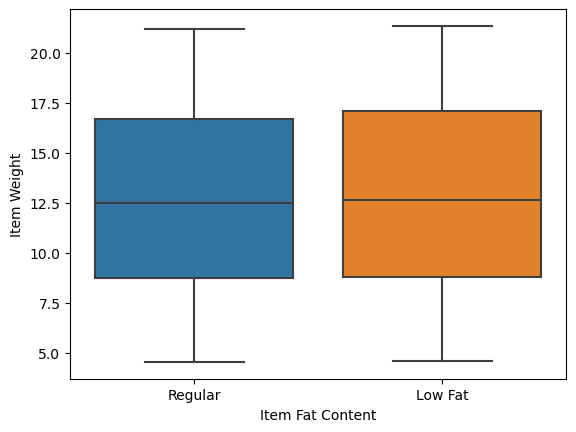

In [89]:
# Weight vs Weight
sns.boxplot(x='Item Fat Content', y='Item Weight', data=df)

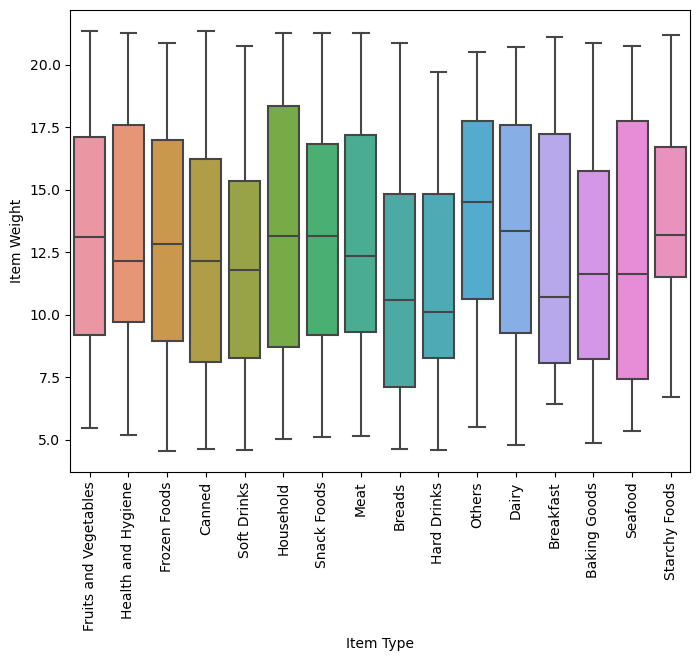

In [90]:
# Type vs Weight
plt.figure(figsize=(8, 6))
sns.boxplot(x='Item Type', y='Item Weight', data=df)
plt.xticks(rotation=90);

In [91]:
# Item Weight showed significant variablity with Item Type

In [92]:
mean_weights = df.groupby('Item Type')['Item Weight'].mean()
mean_weights

Item Type
Baking Goods             12.277108
Breads                   11.346936
Breakfast                12.768202
Canned                   12.305705
Dairy                    13.426069
Frozen Foods             12.867061
Fruits and Vegetables    13.224769
Hard Drinks              11.400328
Health and Hygiene       13.142314
Household                13.384736
Meat                     12.817344
Others                   13.853285
Seafood                  12.552843
Snack Foods              12.987880
Soft Drinks              11.847460
Starchy Foods            13.690731
Name: Item Weight, dtype: float64

In [93]:
mean_weights['Baking Goods']

12.277108208955223

In [94]:
# Replace missing weights
df['Item Weight'] = df['Item Weight'].fillna(df['Item Weight'].mean())

df.isnull().sum()

Item Fat Content             0
Item Identifier              0
Item Type                    0
Outlet Establishment Year    0
Outlet Identifier            0
Outlet Location Type         0
Outlet Size                  0
Outlet Type                  0
Item Visibility              0
Item Weight                  0
Sales                        0
Rating                       0
dtype: int64

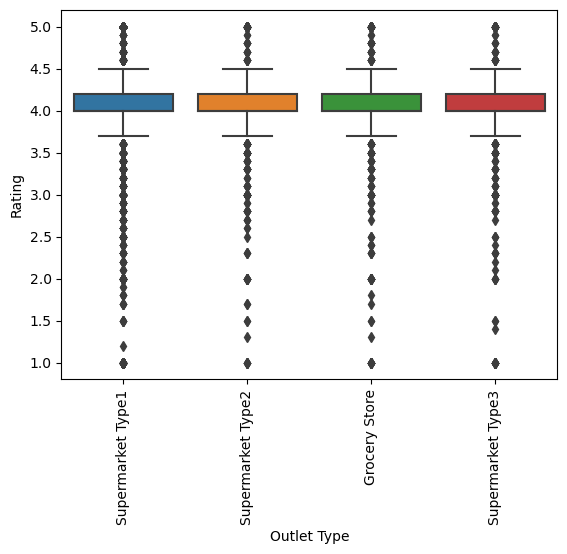

In [114]:
sns.boxplot(x='Outlet Type', y='Rating', data=df)
plt.xticks(rotation=90);

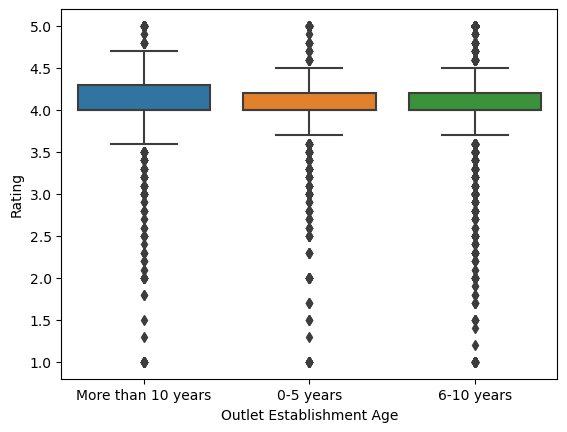

In [111]:
sns.boxplot(x='Outlet Establishment Age', y='Rating', data=df);

In [ ]:
sns.boxplot(x='Outlet Type', y='Rating', data=df)

In [104]:
df.head()

,Item Fat Content,Item Identifier,Item Type,Outlet Establishment Year,Outlet Identifier,Outlet Location Type,Outlet Size,Outlet Type,Item Visibility,Item Weight,Sales,Rating,Outlet Establishment Age
0,Regular,FDX32,Fruits and Vegetables,2012,OUT049,Tier 1,Medium,Supermarket Type1,0.100014,15.10,145.4786,5.0,More than 10 years
1,Low Fat,NCB42,Health and Hygiene,2022,OUT018,Tier 3,Medium,Supermarket Type2,0.008596,11.80,115.3492,5.0,0-5 years
2,Regular,FDR28,Frozen Foods,2016,OUT046,Tier 1,Small,Supermarket Type1,0.025896,13.85,165.0210,5.0,6-10 years
3,Regular,FDL50,Canned,2014,OUT013,Tier 3,High,Supermarket Type1,0.042278,12.15,126.5046,5.0,6-10 years
4,Low Fat,DRI25,Soft Drinks,2015,OUT045,Tier 2,Small,Supermarket Type1,0.033970,19.60,55.1614,5.0,6-10 years
